In [9]:
import torchvision.transforms as transforms
from torchvision.datasets import OxfordIIITPet
from torch.utils.data.dataloader import default_collate
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision import datasets, transforms


In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainval_data = datasets.OxfordIIITPet(root="data", split="trainval", target_types="category", download=True, transform=transform)
test_data = datasets.OxfordIIITPet(root="data", split="test", target_types="category", download=True, transform=transform)
combined_data = ConcatDataset([trainval_data, test_data])

In [12]:
from collections import Counter

image_size = []
image_label = []
unique_labels = set()
images_to_show = []

for image, label in combined_data:
    image_size.append(image.shape)
    image_label.append(label)
    if label not in unique_labels:
        images_to_show.append((image, label))
        unique_labels.add(label)    
size_counter = Counter(image_size)
label_counter = Counter(image_label)

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..

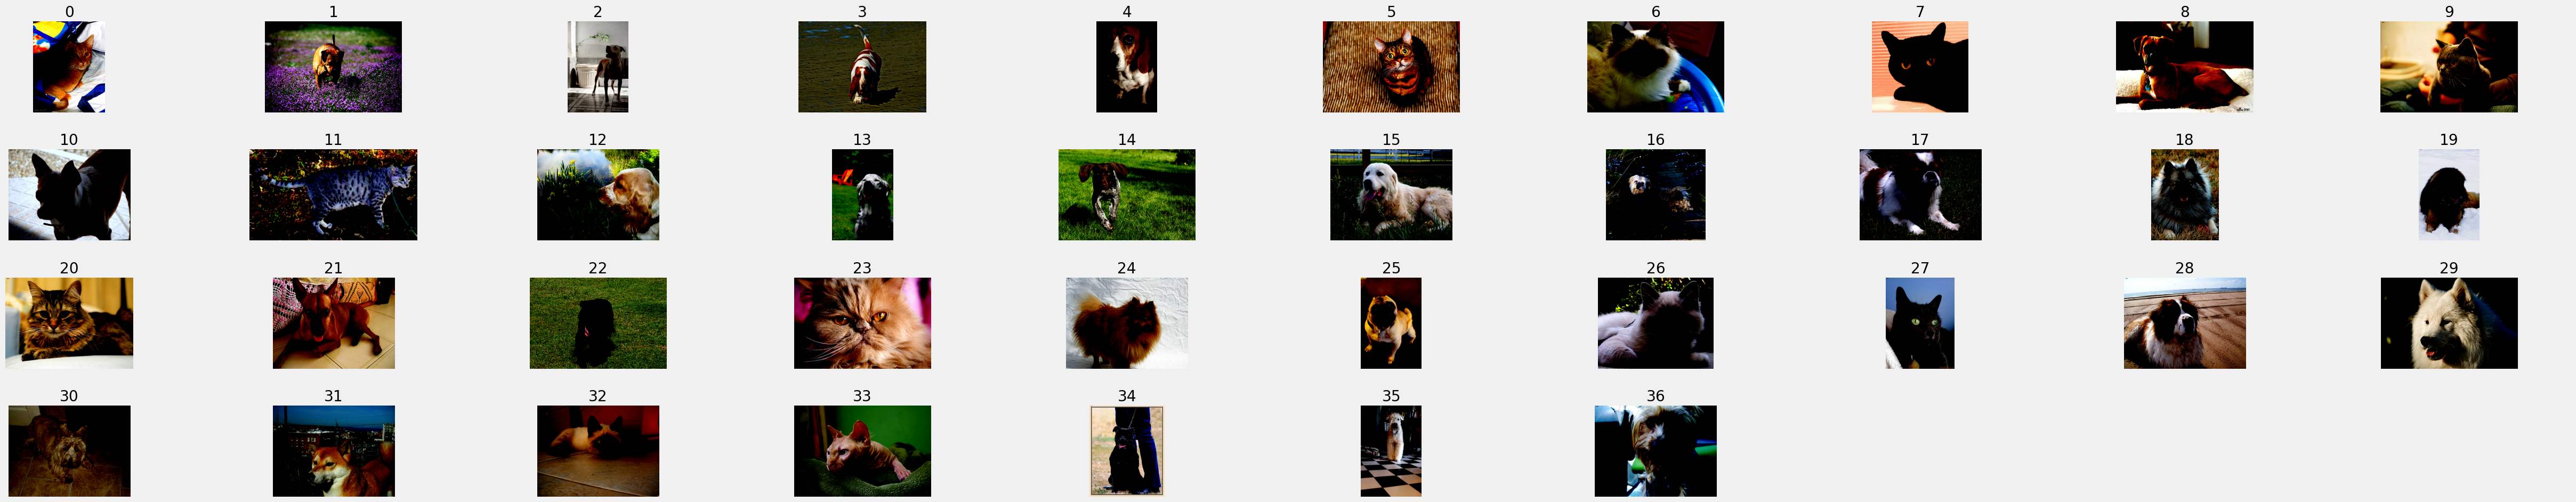

In [ ]:
fig, axes = plt.subplots(4, 10, figsize=(50, 10))

for i, (image, label) in enumerate(images_to_show):
    row = i // 10
    col = i % 10
    ax = axes.flatten()[i]  
    ax.imshow(image.permute(1, 2, 0))  
    ax.axis('off')
    ax.set_title(label)

for i in range(len(images_to_show), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout(pad=2.0)
plt.show()

In [10]:
print(f"There are {len(combined_data)} images in the dataset")
print(f"Number of classes: {len(label_counter)}")
print(f"Number of images sizes: {len(size_counter)}")

There are 7349 images in the dataset
Number of classes: 37
Number of images sizes: 1017


In [11]:
max_height = max(size_counter.keys(), key=lambda x: x[1])[1]  # height (첫 번째 값)
max_width = max(size_counter.keys(), key=lambda x: x[2])[2]   # width (두 번째 값)

min_height = min(size_counter.keys(), key=lambda x: x[1])[1]  # height (첫 번째 값)
min_width = min(size_counter.keys(), key=lambda x: x[2])[2]   # width (두 번째 값)

print(f"Max height: {max_height}, Max width: {max_width}")
print(f"Min height: {min_height}, Min width: {min_width}")

Max height: 2606, Max width: 3264
Min height: 103, Min width: 114


In [22]:
max_label = max(label_counter, key=label_counter.get)
min_label = min(label_counter, key=label_counter.get)

print(f"Max label: {max_label}, Max label count: {label_counter[max_label]}")
print(f"Min label: {min_label}, Min label count: {label_counter[min_label]}")

Max label: 1, Max label count: 200
Min label: 7, Min label count: 184


In [12]:
size2count = {}
for _, height, width in size_counter.keys():
    size2count[(height, width)] = size_counter[(3, height, width)]


In [16]:
height_bins = np.arange(100, 700, 200).tolist() + [700]
width_bins = np.arange(100, 700, 200).tolist() + [700]

size2range = {}
for height_bin in height_bins:
    for width_bin in width_bins:
        size2range[(height_bin, width_bin)] = 0

for size, count in size2count.items():
    #print(f"Processing size: {size}, Count: {count}")
    h, w = size
    
    height_bin = np.digitize(h, height_bins) - 1  
    width_bin = np.digitize(w, width_bins) - 1  
    size2range[(height_bins[height_bin], width_bins[width_bin])] += count
    
size2range2str = {}
for size, count in size2range.items():
    size2range2str[f"{size[0]}x{size[1]}"] = count

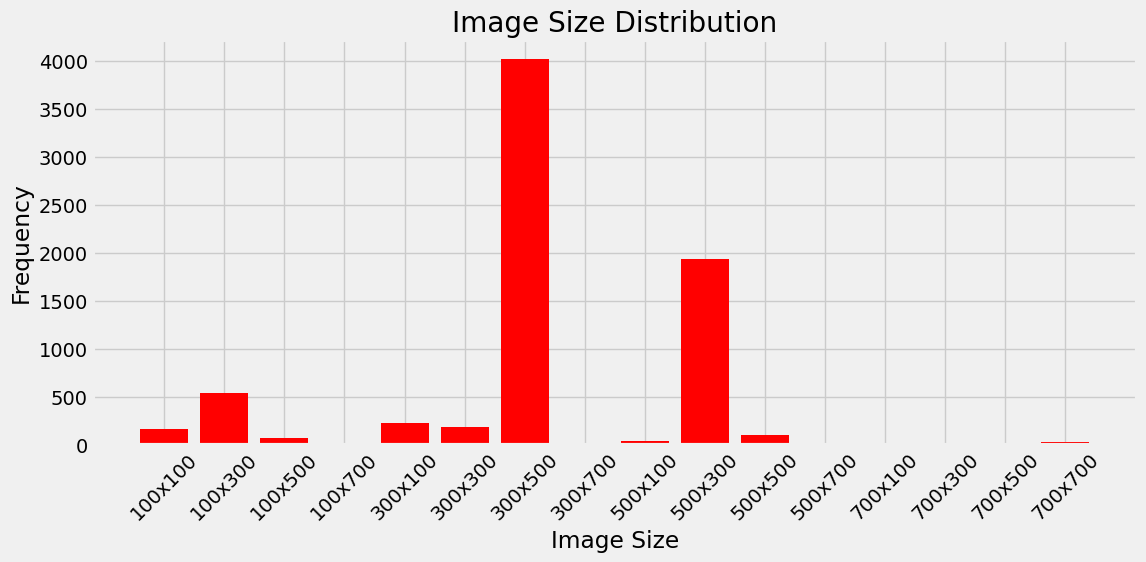

In [23]:
plt.figure(figsize=(12, 5))
plt.bar(size2range2str.keys(), size2range.values(), color = 'red')
plt.xlabel("Image Size")
plt.ylabel("Frequency")
plt.title("Image Size Distribution")
plt.xticks(rotation=45)

plt.show()

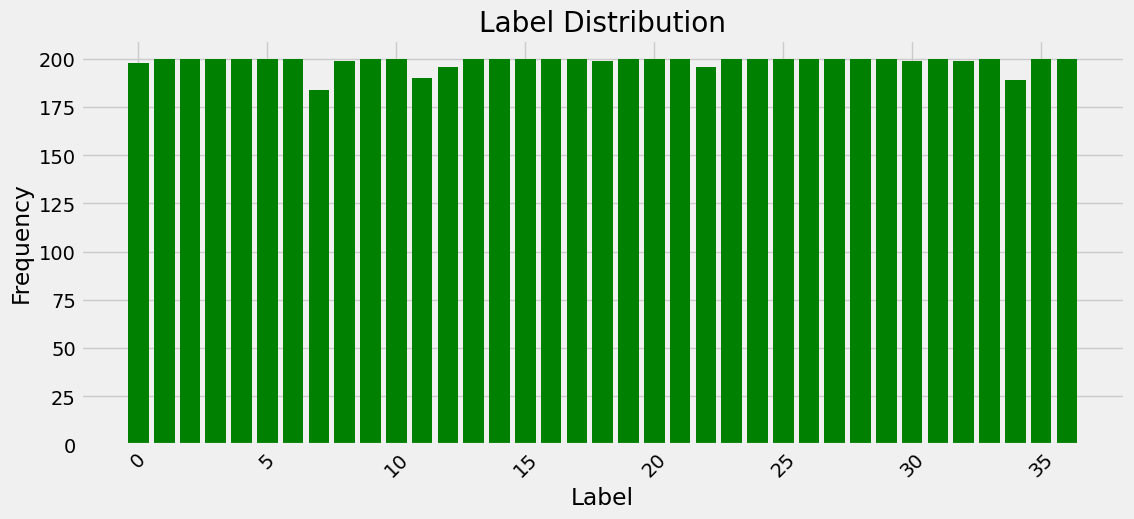

In [24]:
label_labels = label_counter.keys()
label_values = label_counter.values()

plt.figure(figsize=(12, 5))
plt.bar(label_labels, label_values, color = 'green')
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Label Distribution")
plt.xticks(rotation=45)

plt.show()
